In [22]:
import numpy as np
import pandas as pd
import re

In [28]:
df = pd.read_csv('/home/mr1142/Documents/Data/segmentation/splited/validation/validation_data.csv')
labels = [re.split('[|]', df['Finding Labels'][i]) for i in df.index]
labels = [x for xs in labels for x in xs]
labels = list(np.unique(labels))
labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [300]:
path = '/home/mr1142/Documents/Data/models/validation_results/validation_results' + '' + '.csv'
df = pd.read_csv(path)

In [301]:
df.sort_values('dice_coef_loss')

,type,name,loss,dice_coef_loss,loss_mask,accuracy,AUC,false_positives,false_negatives
10,unet,renacimiento_validation_1,0.032621,0.032179,0.092485,0.973949,0.974434,88665.0,80353.0
2,unet,_albumentation_validation_2.h5,0.034487,0.034487,0.095812,0.973940,0.974166,7962.0,5701.0
7,uloss,albumentation_rotate_3_validation_2,0.129951,0.034909,0.094568,0.971946,0.973499,87304.0,94711.0
6,uloss,albumentation_rotate_3_validation_1,0.128454,0.035279,0.092766,0.971818,0.972174,78499.0,104346.0
5,unet,albumentation_rotate_3_validation_2,0.035893,0.035434,0.097252,0.971598,0.971085,81626.0,102645.0
3,uloss,_albumentation_validation_2.h5,0.149065,0.036346,0.112719,0.972670,0.973263,6937.0,7392.0
4,unet,albumentation_rotate_3_validation_1,0.037508,0.036994,0.104480,0.970098,0.969842,87088.0,106918.0
0,unet,_albumentation_validation_1.h5,0.037296,0.037296,0.117240,0.971939,0.970628,7386.0,7326.0
9,uloss,validation_rotate_normalization_1,0.134512,0.037305,0.097394,0.970390,0.971013,91815.0,100297.0
8,unet,validation_rotate_normalization_1,0.038100,0.037542,0.103917,0.969410,0.968877,90885.0,107587.0


In [302]:
len(df[df.type == 'uloss'])

7

In [303]:
len(df[df.type == 'uloss']) == len(df[df.type == 'unet'])

True

In [304]:
evaluations = list(df.columns[3:9])

for ev in evaluations:
    print(ev)
    print('unet: {}'.format(np.mean(df[ev][df.type == 'unet'])))
    print('uloss: {}'.format(np.mean(df[ev][df.type == 'uloss'])))
    print('-----')

dice_coef_loss
unet: 0.03621087223291397
uloss: 0.11706961478505816
-----
loss_mask
unet: 0.10254700588328498
uloss: 0.21049323678016663
-----
accuracy
unet: 0.9712409717696053
uloss: 0.9146997928619385
-----
AUC
unet: 0.9710351484162467
uloss: 0.9077550513403756
-----
false_positives
unet: 67814.85714285714
uloss: 177098.57142857142
-----
false_negatives
unet: 72666.14285714286
uloss: 328127.4285714286
-----


In [305]:
names = ['_albumentation', 'rotate', 'renacimiento']

In [306]:
tipos = {}
tipos['unet'] = {}
tipos['uloss'] = {}
for ev in evaluations:
    tipos['unet'][ev] = np.mean(df[ev][df.type == 'unet'])
    tipos['uloss'][ev] = np.mean(df[ev][df.type == 'uloss'])
    for name in names:
        index = [i for i in df.index if bool(re.search(name, df['name'][i]))]
        try:
            tipos[name][ev] = np.mean(df[ev].iloc[index])
        except:
            tipos[name] = {}
            tipos[name][ev] = np.mean(df[ev].iloc[index])

In [307]:
tipos

{'unet': {'dice_coef_loss': 0.03621087223291397,
  'loss_mask': 0.10254700588328498,
  'accuracy': 0.9712409717696053,
  'AUC': 0.9710351484162467,
  'false_positives': 67814.85714285714,
  'false_negatives': 72666.14285714286},
 'uloss': {'dice_coef_loss': 0.11706961478505816,
  'loss_mask': 0.21049323678016663,
  'accuracy': 0.9146997928619385,
  'AUC': 0.9077550513403756,
  'false_positives': 177098.57142857142,
  'false_negatives': 328127.4285714286},
 '_albumentation': {'dice_coef_loss': 0.03676915168762207,
  'loss_mask': 0.10717159509658813,
  'accuracy': 0.9723238945007324,
  'AUC': 0.9721685945987701,
  'false_positives': 7447.25,
  'false_negatives': 7063.0},
 'rotate': {'dice_coef_loss': 0.06916744687727519,
  'loss_mask': 0.15150830362524306,
  'accuracy': 0.9451229657445636,
  'AUC': 0.9434502976281303,
  'false_positives': 161125.14285714287,
  'false_negatives': 194920.57142857142},
 'renacimiento': {'dice_coef_loss': 0.03217913955450058,
  'loss_mask': 0.092485383152961

In [280]:
comparation = {}
for k in tipos['unet'].keys():
    comparation[k] = []
    for j in tipos.keys():
        comparation[k].append(tipos[j][k])
comparation = pd.DataFrame(comparation)
comparation.index = tipos.keys()

In [281]:
comparation.sort_values('dice_coef_loss')

,dice_coef_loss,loss_mask,accuracy,AUC,false_positives,false_negatives
renacimiento,0.032179,0.092485,0.973949,0.974434,88665.000000,80353.000000
unet,0.036211,0.102547,0.971241,0.971035,67814.857143,72666.142857
_albumentation,0.036769,0.107172,0.972324,0.972169,7447.250000,7063.000000
rotate,0.069167,0.151508,0.945123,0.943450,161125.142857,194920.571429
uloss,0.074916,0.161757,0.941362,0.939705,147119.666667,177086.500000


In [282]:
index = [i for i in df.index if any([bool(re.search(name, df['name'][i])) for name in ['old', 'clahe', 'gamma']])]

In [283]:
df = df.drop(index).reset_index()

In [284]:
tipos = {}
for tipo in ['unet', 'uloss']:
    for ev in evaluations:
        for name in names:
            index = [i for i in df.index if bool(re.search(name, df['name'][i]))]
            try:
                tipos[tipo + '_' + name][ev] = np.mean(df[ev].iloc[index][df['type']==tipo])
            except:
                tipos[tipo + '_' + name] = {}
                tipos[tipo + '_' + name][ev] = np.mean(df[ev].iloc[index][df['type']==tipo])

In [285]:
tipos

{'unet__albumentation': {'dice_coef_loss': 0.03589135408401489,
  'loss_mask': 0.10652638971805573,
  'accuracy': 0.9729394912719727,
  'AUC': 0.972397118806839,
  'false_positives': 7674.0,
  'false_negatives': 6513.5},
 'unet_rotate': {'dice_coef_loss': 0.03665660570065181,
  'loss_mask': 0.10188330709934235,
  'accuracy': 0.9703687032063802,
  'AUC': 0.969934900601705,
  'false_positives': 86533.0,
  'false_negatives': 105716.66666666667},
 'unet_renacimiento': {'dice_coef_loss': 0.03217913955450058,
  'loss_mask': 0.09248538315296173,
  'accuracy': 0.973949372768402,
  'AUC': 0.9744343161582948,
  'false_positives': 88665.0,
  'false_negatives': 80353.0},
 'uloss__albumentation': {'dice_coef_loss': 0.03764694929122925,
  'loss_mask': 0.10781680047512054,
  'accuracy': 0.9717082977294922,
  'AUC': 0.9719400703907014,
  'false_positives': 7220.5,
  'false_negatives': 7612.5},
 'uloss_rotate': {'dice_coef_loss': 0.09355057775974274,
  'loss_mask': 0.18872705101966858,
  'accuracy': 0.

In [287]:
comparation = {}
for k in tipos['uloss_renacimiento'].keys():
    comparation[k] = []
    for j in tipos.keys():
        comparation[k].append(tipos[j][k])
comparation = pd.DataFrame(comparation)
comparation.index = tipos.keys()

In [288]:
comparation.sort_values('dice_coef_loss')

,dice_coef_loss,loss_mask,accuracy,AUC,false_positives,false_negatives
unet_renacimiento,0.032179,0.092485,0.973949,0.974434,88665.00,80353.000000
unet__albumentation,0.035891,0.106526,0.972939,0.972397,7674.00,6513.500000
unet_rotate,0.036657,0.101883,0.970369,0.969935,86533.00,105716.666667
uloss__albumentation,0.037647,0.107817,0.971708,0.971940,7220.50,7612.500000
uloss_rotate,0.093551,0.188727,0.926189,0.923587,217069.25,261823.500000
uloss_renacimiento,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
import seaborn as sns
import matplotlib.pyplot as plt

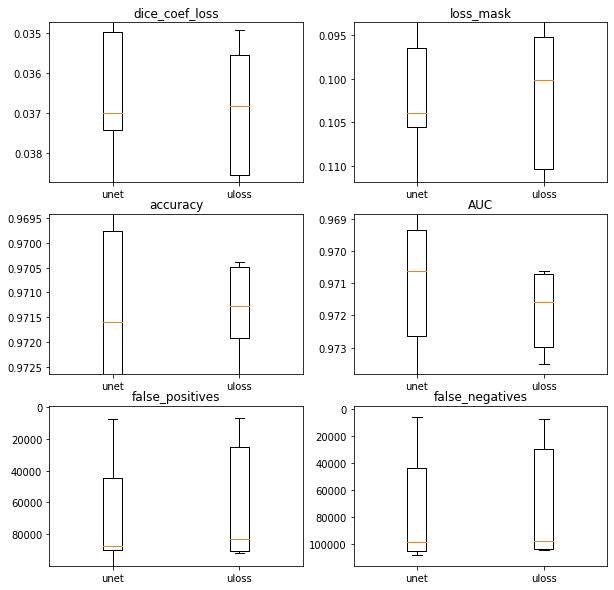

In [290]:
unet = df[['name'] + evaluations][df.type == 'unet'].reset_index()
uloss = df[['name'] + evaluations][df.type == 'uloss'].reset_index()

fig, ax = plt.subplots(3, 2)
fig.set_size_inches(10,10)

for i, ev in enumerate(evaluations):
    if i%2 == 0:
        y = 0
    else:
        y = 1
    x = int(i/2)
    ax[x,y].boxplot([unet[ev], uloss[ev]], labels = ['unet', 'uloss'])
    q1, q3 = np.percentile(df[ev], [20, 80])
    r = q1-q3
    ax[x,y].set_ylim(q1-1.1*r, q3+1.1*r)
    ax[x,y].set_title(ev)

In [291]:
# data = {}
# for tipo in ['unet', 'uloss']:
#     data[tipo] = {}
#     for name in names:
#         d = df[df.type == 'unet'].reset_index()
#         index = [i for i in d.index if bool(re.search(name, d['name'][i]))]
#         data[tipo][name] = d.iloc[index]

In [292]:
data = {}
for name in names:
    index = [i for i in df.index if bool(re.search(name, df['name'][i]))]
    data[name] = df.iloc[index]

In [293]:
data

{'_albumentation':    level_0  index   type                            name      loss  \
 0        0      0   unet  _albumentation_validation_1.h5  0.037296   
 1        1      1  uloss  _albumentation_validation_1.h5  0.141863   
 2        2      2   unet  _albumentation_validation_2.h5  0.034487   
 3        3      3  uloss  _albumentation_validation_2.h5  0.149065   
 
    dice_coef_loss  loss_mask  accuracy       AUC  false_positives  \
 0        0.037296   0.117240  0.971939  0.970628           7386.0   
 1        0.038948   0.102915  0.970747  0.970617           7504.0   
 2        0.034487   0.095812  0.973940  0.974166           7962.0   
 3        0.036346   0.112719  0.972670  0.973263           6937.0   
 
    false_negatives  
 0           7326.0  
 1           7833.0  
 2           5701.0  
 3           7392.0  ,
 'rotate':     level_0  index   type                                 name      loss  \
 4         4      4   unet  albumentation_rotate_3_validation_1  0.037508  

In [298]:
len(datos_unet)

3

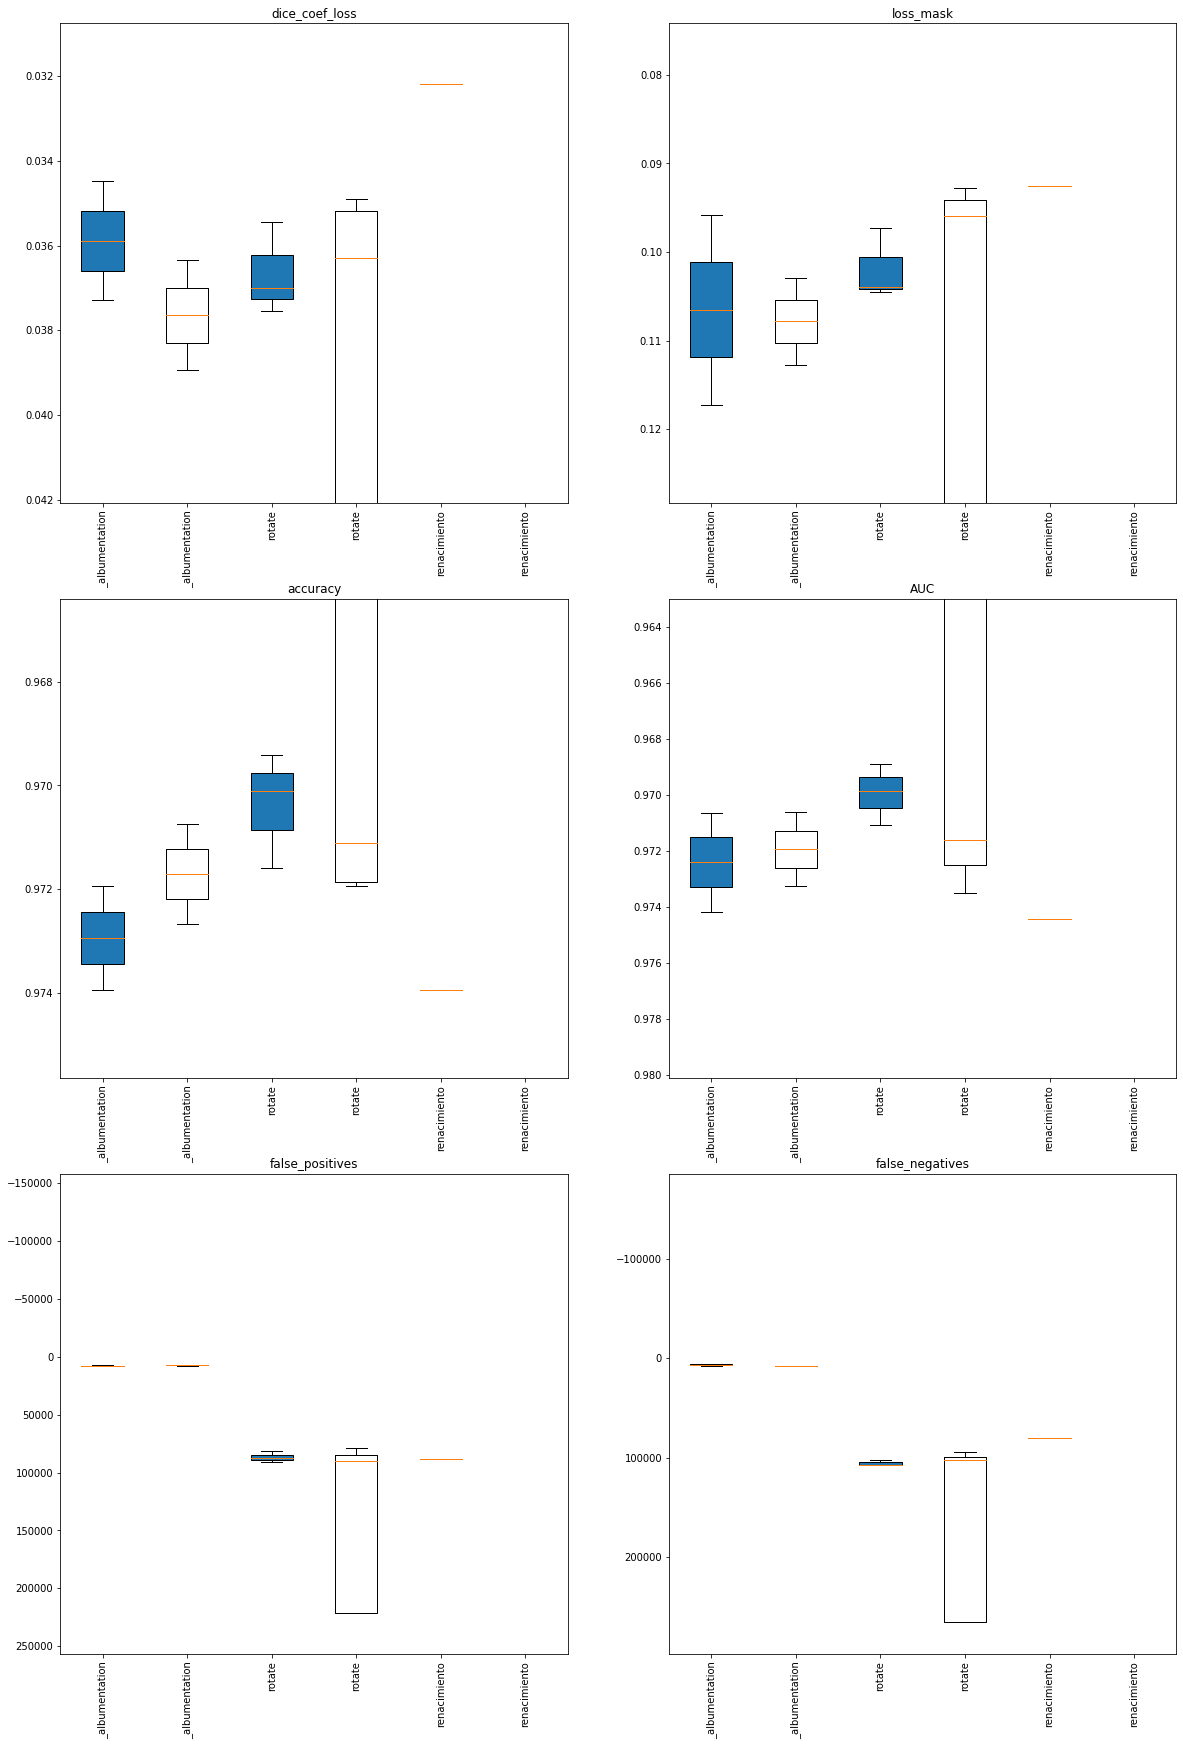

In [299]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(20,30)

for i, ev in enumerate(evaluations):
    if i%2 == 0:
        y = 0
    else:
        y = 1
    x = int(i/2)
    datos_unet = [data[name][ev][data[name].type == 'unet'] for name in names]
    datos_uloss = [data[name][ev][data[name].type == 'uloss'] for name in names]
    labels = [name + '_unet' for name in names]
    ax[x,y].boxplot(datos_unet, positions = [1,3,5], patch_artist=True)
    labels = [name + '_uloss' for name in names]
    ax[x,y].boxplot(datos_uloss, positions = [2,4,6])
    q1, q3 = np.percentile(df[ev], [25, 75])
    r = q1-q3
    ax[x,y].set_xticklabels(names*2, rotation=90)
    ax[x,y].set_ylim(q1-3*r, q3+3*r)
    ax[x,y].set_title(ev)